# **AAI614: Data Science & its Applications**
# Graded Assessment: Project 1
---
*Mostafa Zein al Abidine - 201201495*

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mostafa-zea/AAI614_-zeinalabidine-/blob/main/AAI_614O_Project1_Mostafa_Z.ipynb)


In [1]:
import pandas as pd
import numpy as np

columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
           "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
           "hours_per_week", "native_country", "income"]

df = pd.read_csv("https://raw.githubusercontent.com/mostafa-zea/AAI614_-zeinalabidine-/main/adult.data",
                 header=None, names=columns, skipinitialspace=True)

## Data exploration

### 1. Check the columns of your data. Are they the expected data types based on their descriptions in this text file description of the data?

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The columns were correctly imported, and their data types match the descriptions in the text file `adult.names`

- Continuous/numeric features were correctly recognized as `int64`

- Categorical features were correctly recognized as `object` (string)

The `income` column which contains comparison values `<=50K` and `>50K`, is currently recognized as an object/string. It will have to be converted to a numeric representation when performing the regression task.


---

### 2. How are missing values represented in this data? Cast missing values to np.nan, if necessary. Count the number of missing values in each column.

In [4]:
df.replace("?", np.nan, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
missing_values=df.isna().sum()
print(missing_values)

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Missing values are represented as `"?"` in the data

Reading the data file with the parameter `skipinitialspace=True` ensured that values like `" ?"` (which do appear in the data file) were interpreted as `"?"`

Missing values were then cast to `np.nan` using `df.replace("?", np.nan, inplace=True)`

Counting the missing values in each column shows that they appear in the following features as follows:

- `workclass`: 1,836 missing values  
- `occupation`: 1,843 missing values  
- `native_country`: 583 missing values  

This matches the description on the dataset's source website




---

### 3. Individually plot the distributions of capital_gain and capital_loss. Do you think these variables should be transformed into categorical variables? Why or why not? If yes, create a new variable(s) with your suggested transformation and plot or describe in a table the distribution of the new categorical variable(s).

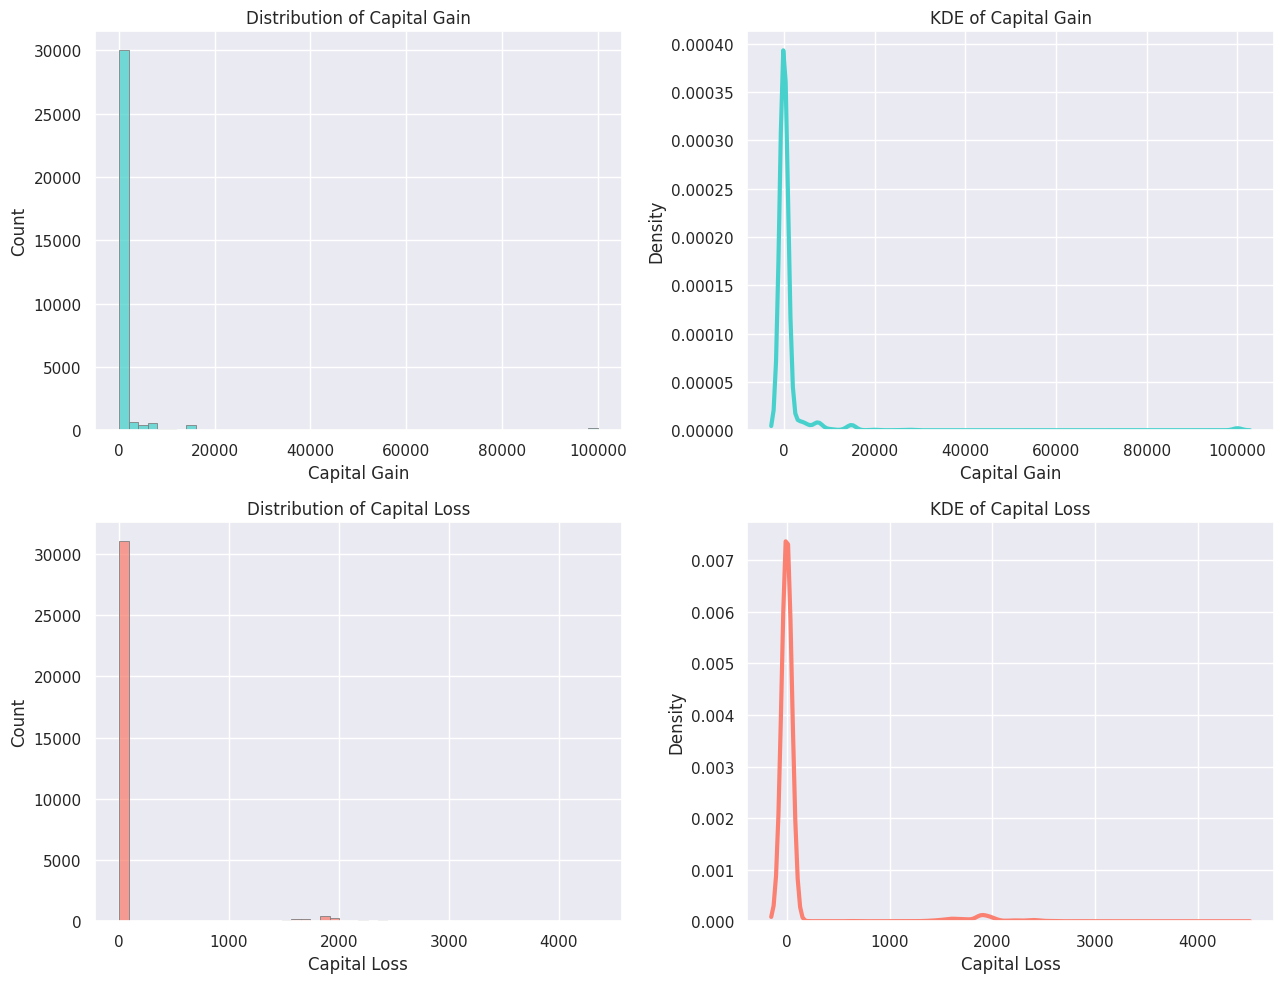

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(13, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['capital_gain'], bins=50, color='mediumturquoise', edgecolor='gray')
plt.title('Distribution of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
sns.histplot(df['capital_loss'], bins=50, color='salmon', edgecolor='gray')
plt.title('Distribution of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
sns.kdeplot(df['capital_gain'], color='mediumturquoise', linewidth=3)
plt.title('KDE of Capital Gain')
plt.xlabel('Capital Gain')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.kdeplot(df['capital_loss'], color='salmon', linewidth=3)
plt.title('KDE of Capital Loss')
plt.xlabel('Capital Loss')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


Yes, it would be better if `capital_gain` and `capital_loss` were tranfromed into categorical variables.

The plots are extremely right-skewed, which shows that the vast majority of values are zero, with relatively very few large/non-zero values.

The non-zero values are sparse with very low counts, it would be better to regard them as a single category.

In [64]:
df['capital_gain_cat'] = df['capital_gain'].apply(lambda x: 'has_gain' if x > 0 else 'no_gain')
df['capital_loss_cat'] = df['capital_loss'].apply(lambda x: 'has_loss' if x > 0 else 'no_loss')

In [65]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_gain_cat,capital_loss_cat
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,has_gain,no_loss
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,no_gain,no_loss
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,no_gain,no_loss
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,no_gain,no_loss
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,no_gain,no_loss


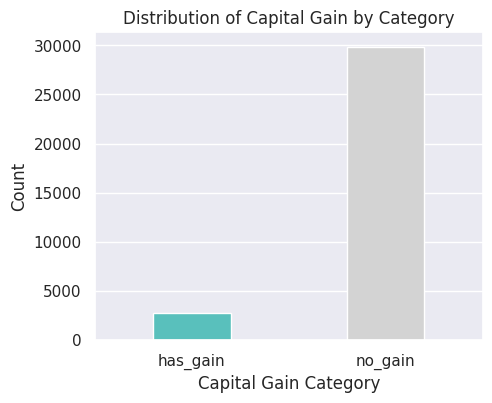

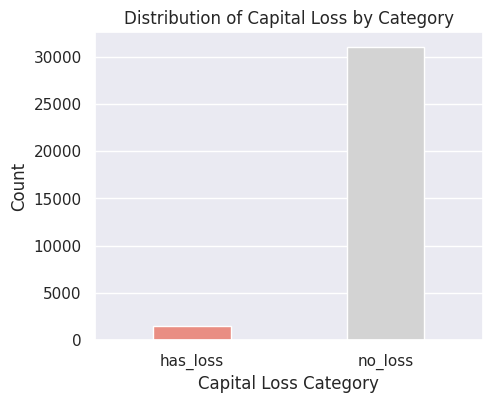

In [91]:
plt.figure(figsize=(5, 4))
sns.countplot(x='capital_gain_cat', hue='capital_gain_cat', data=df, order=['has_gain', 'no_gain'],
              palette={'has_gain': 'mediumturquoise', 'no_gain': 'lightgray'}, width=0.4)
plt.title('Distribution of Capital Gain by Category')
plt.xlabel('Capital Gain Category')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 4))
sns.countplot(x='capital_loss_cat', hue='capital_loss_cat', data=df, order=['has_loss', 'no_loss'],
              palette={'has_loss': 'salmon', 'no_loss': 'lightgray'}, width=0.4)
plt.title('Distribution of Capital Loss by Category')
plt.xlabel('Capital Loss Category')
plt.ylabel('Count')
plt.show()